# Generate plot visualizing key stats for AMIP1 -> CMIP6 MIP eras

In [1]:
# Updates
# PJD 12 Sep 2022 - Updated to qualify forcing is DECK/historical only
# PJD 12 Sep 2022 - Remove forcing from top plot

## imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os

## define time info

In [3]:
timeNow = datetime.datetime.now()
timeFormat = timeNow.strftime("%y%m%dT%H%M%S")
print("timeFormat:", timeFormat)

timeFormat: 220912T130056


## define input data

In [4]:
labels = ["AMIP1", "AMIP2", "CMIP1", "CMIP2", "CMIP3", "CMIP5", "CMIP6"]
experiments = [1, 1, 1, 2, 12, 34, 322]  # CMIP6 values pulled from https://github.com/WCRP-CMIP/CMIP6_CVs
models = [29, 32, 20, 17, 24, 59, 131]
institutions = [28, 25, 16, 15, 16, 26, 49]
countries = [9, 9, 8, 8, 11, 12, 26]
forcingCounts = [2, 2, 0, 1, 15, 24, 63]  # https://docs.google.com/presentation/d/1_51Oohg4unT_W_F2xskYoOB3yIshMwxBBEnD6gIBI7Q/edit?usp=sharing
forcingCountsBlank = np.empty(7,)
forcingCountsBlank[:] = np.nan

## first plot - no forcing

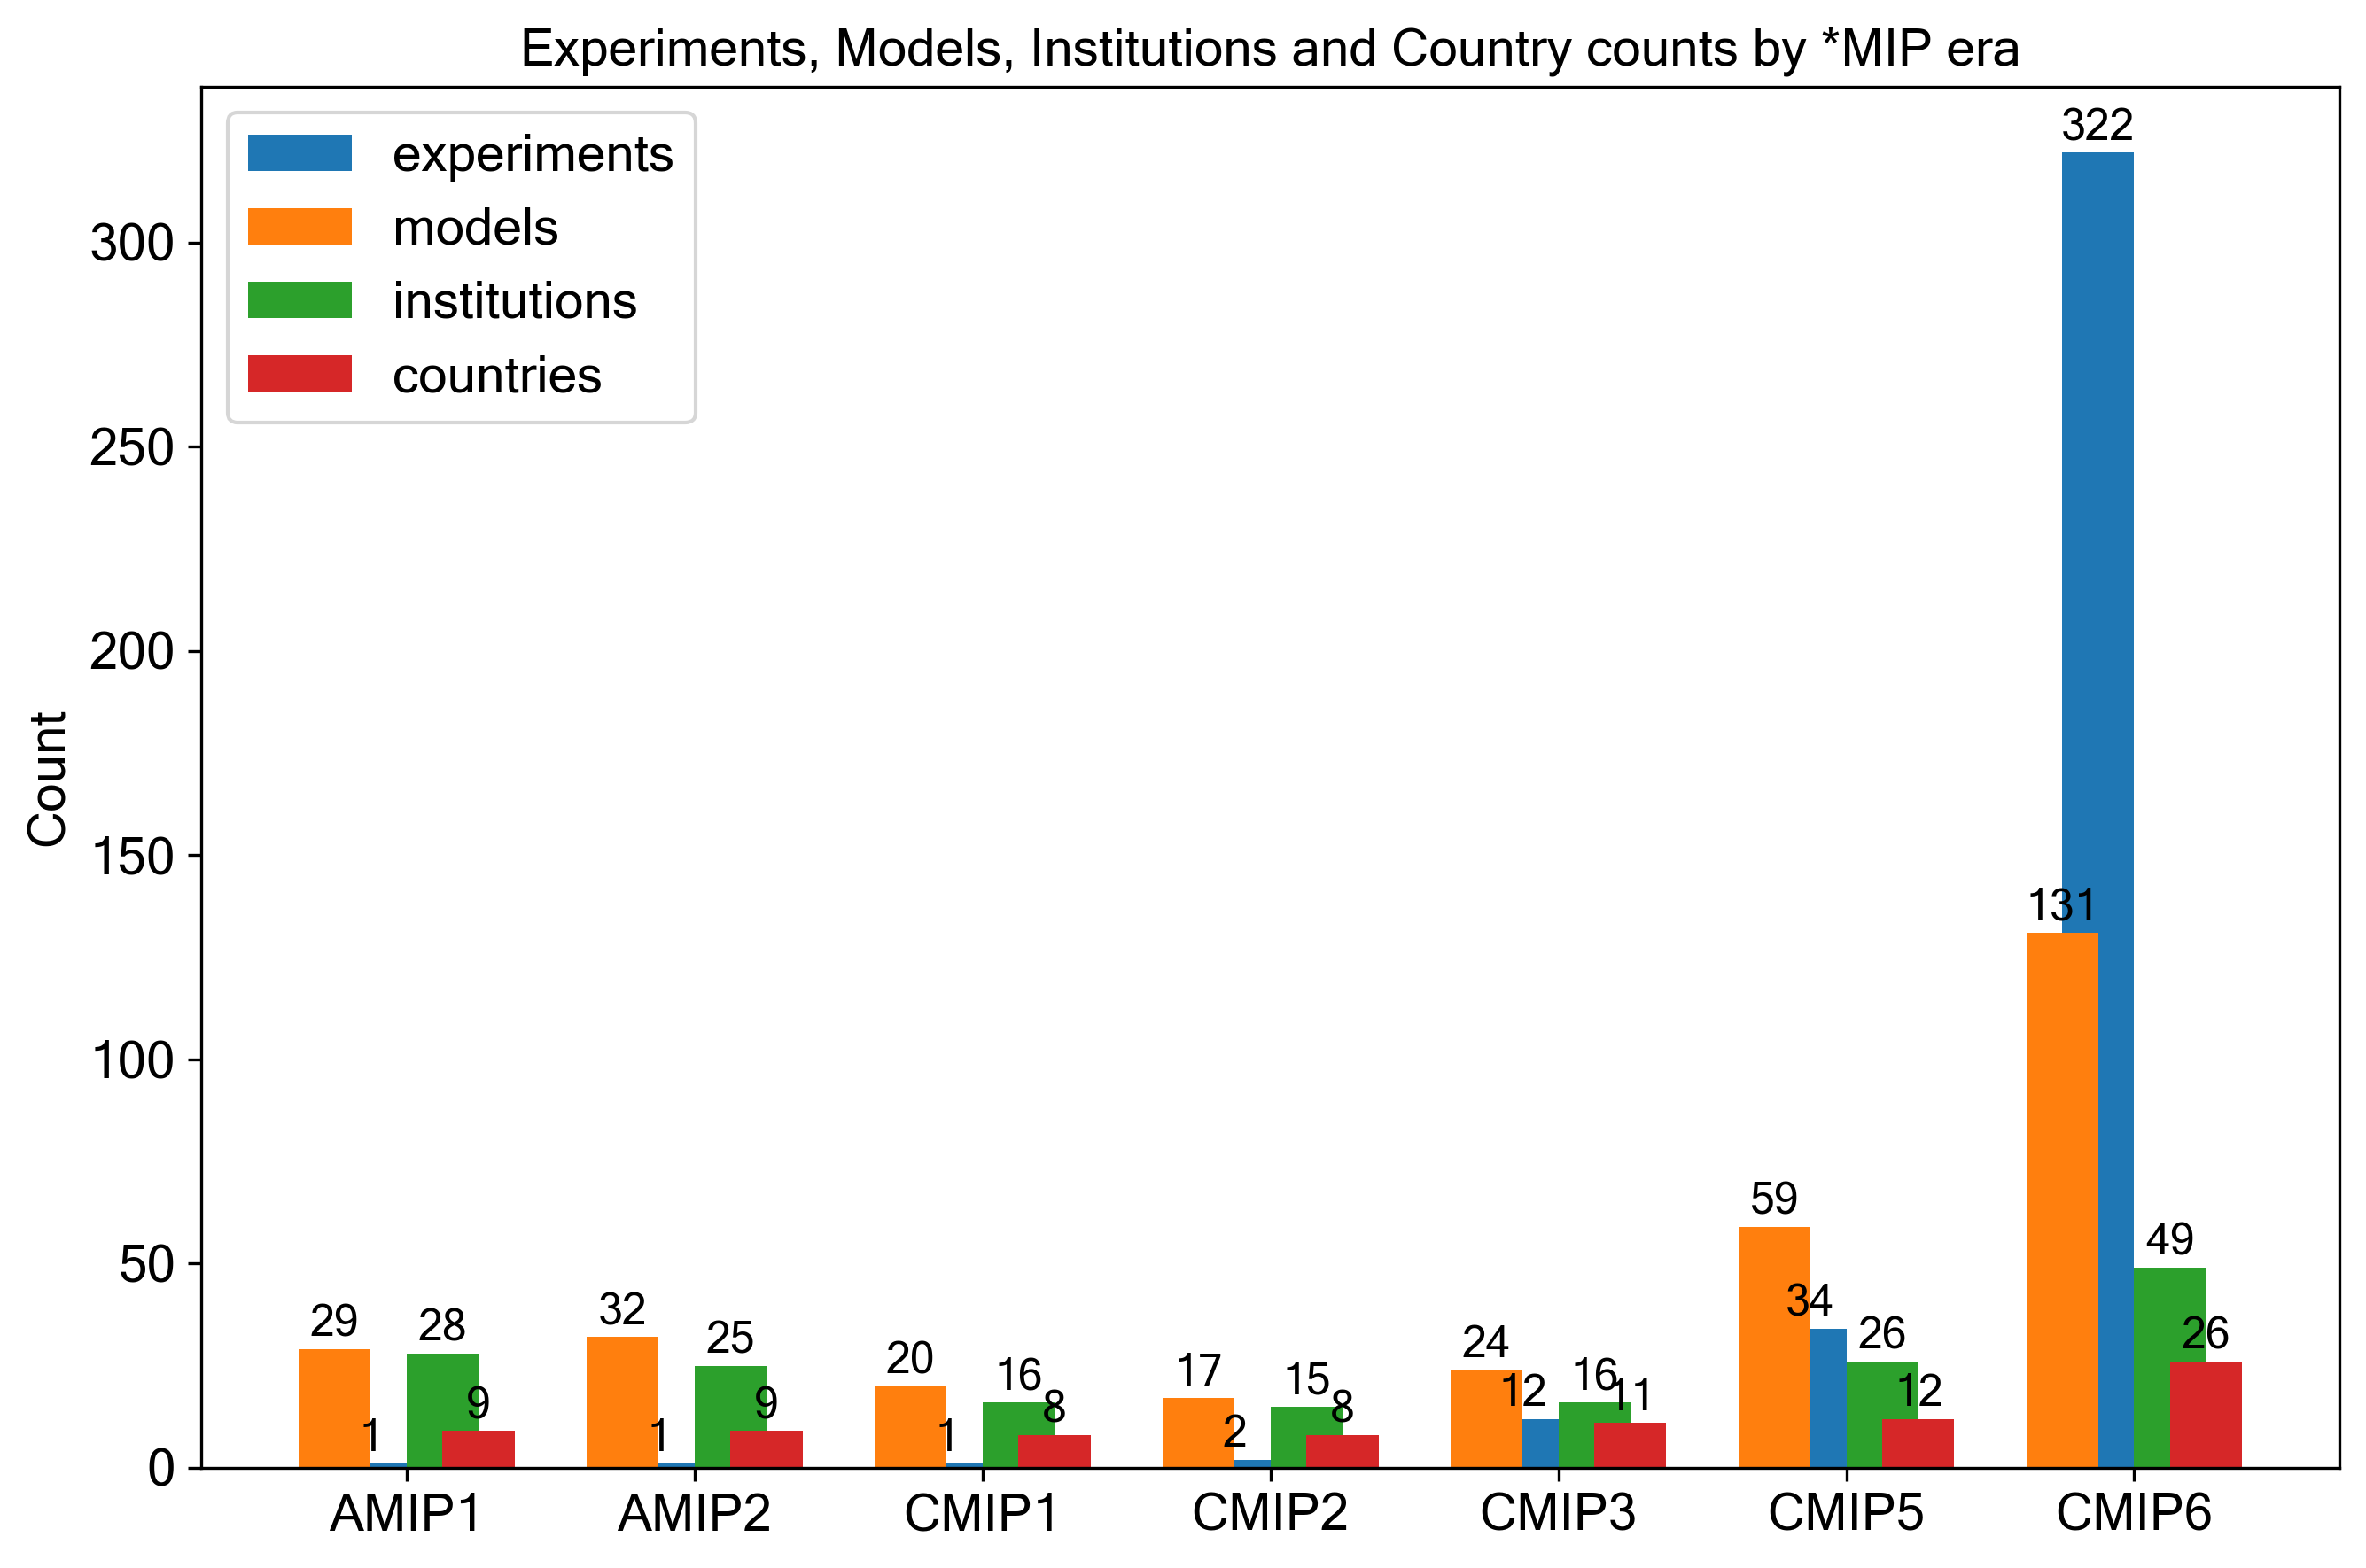

In [5]:
# set inputs
x = np.arange(len(labels))  # label locations
width = 0.25  # width of the bars
fontsize = 14
fontName = "Microsoft Sans Serif"

# initialize canvas
fig, ax = plt.subplots(figsize=(9, 6), dpi=300)

# plot
rects1 = ax.bar(x - width*.5, experiments, width, label="experiments")
rects3 = ax.bar(x - width, models, width, label="models")
rects2 = ax.bar(x + width*.5, institutions, width, label="institutions")
rects4 = ax.bar(x + width, countries, width, label="countries")
#rects5 = ax.bar(x + width*1.5, forcingCountsBlank, width, label="forcings (DECK/historical only - no *MIPs considered)")

# pretty things up - add text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Experiments, Models, Institutions and Country counts by *MIP era',
             fontname=fontName, fontsize=fontsize)
ax.set_ylabel('Count', fontname=fontName, fontsize=fontsize)
plt.yticks(fontname=fontName, fontsize=fontsize)
ax.set_xticks(x, labels, fontname=fontName, fontsize=fontsize)
ax.legend(prop={"family": fontName, "size": fontsize})

# label cleanup
padding = 1
labelSize = 12

ax.bar_label(rects1, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects2, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects3, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects4, padding=padding, fontname=fontName, fontsize=labelSize)
#ax.bar_label(rects5, padding=padding, fontname=fontName, fontsize=labelSize)

# fill canvas
fig.tight_layout()

# display, save and close
plt.show()
fig.savefig("_".join([timeFormat,"MIPEvolution-Counts.png"]))

## now plot - with forcing

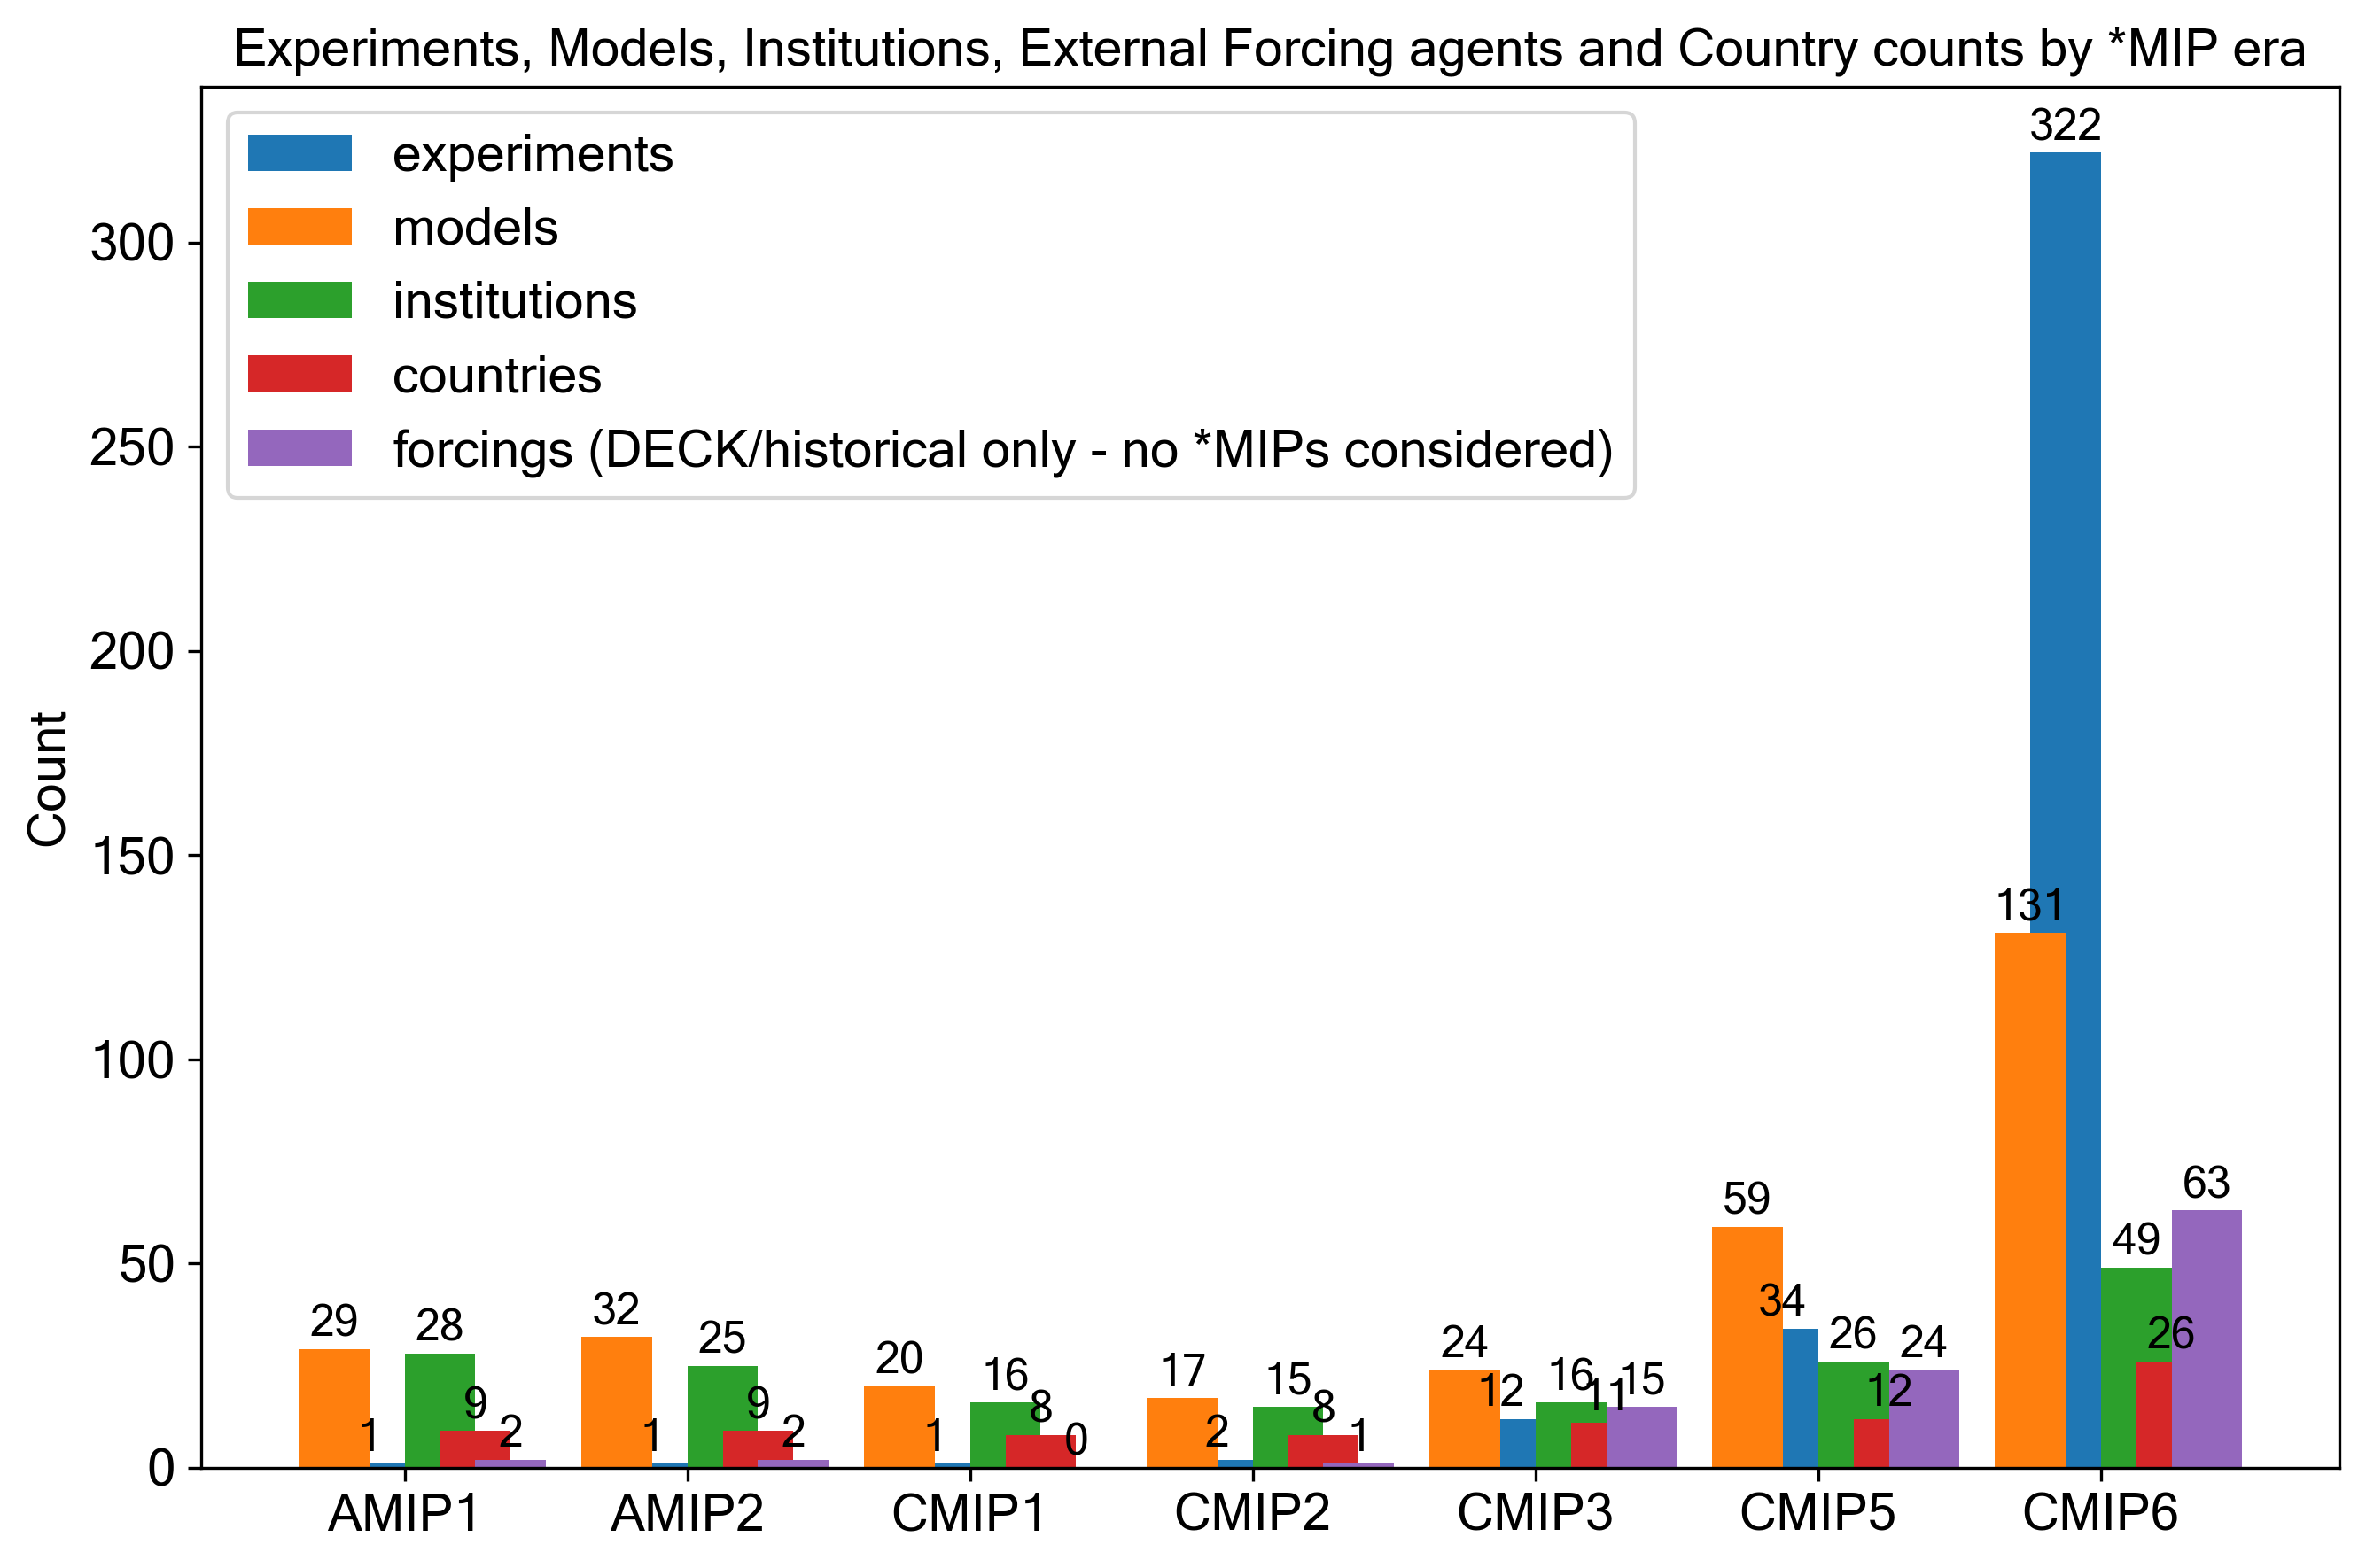

In [6]:
# set inputs
x = np.arange(len(labels))  # label locations
width = 0.25  # width of the bars
fontsize = 14
fontName = "Microsoft Sans Serif"

# initialize canvas
fig, ax = plt.subplots(figsize=(9, 6), dpi=300)

# plot
rects1 = ax.bar(x - width*.5, experiments, width, label="experiments")
rects3 = ax.bar(x - width, models, width, label="models")
rects2 = ax.bar(x + width*.5, institutions, width, label="institutions")
rects4 = ax.bar(x + width, countries, width, label="countries")
rects5 = ax.bar(x + width*1.5, forcingCounts, width, label="forcings (DECK/historical only - no *MIPs considered)")

# pretty things up - add text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Experiments, Models, Institutions, External Forcing agents and Country counts by *MIP era',
             fontname=fontName, fontsize=fontsize)
ax.set_ylabel('Count', fontname=fontName, fontsize=fontsize)
plt.yticks(fontname=fontName, fontsize=fontsize)
ax.set_xticks(x, labels, fontname=fontName, fontsize=fontsize)
ax.legend(prop={"family": fontName, "size": fontsize})

# label cleanup
padding = 1
labelSize = 12

ax.bar_label(rects1, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects2, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects3, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects4, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects5, padding=padding, fontname=fontName, fontsize=labelSize)

# fill canvas
fig.tight_layout()

# display, save and close
plt.show()
fig.savefig("_".join([timeFormat,"MIPEvolution-Counts-plusForcing.png"]))